<p style="font-size:300%; text-align:center"> Telco Customer Churn modeling</p>
<p style="font-size:150%; text-align:center"> Focused customer retention programs <br> MOD3 Project - 4. Modeling</p>

In [1]:
# import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
# import important cleaned data
df = pd.read_csv("data/telco_clean.csv") # replace this 
#df.sample(6).T

In [3]:
df['Churn'] = df['Churn'].apply(lambda x: x.strip().replace("Yes", "1").replace("No", "0"))
df['Churn'] = df['Churn'].astype('int') 

## Seperate x, y and make dummy vatriables 

In [4]:
df = pd.get_dummies(df)
display(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No_phone',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No_internet', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No_internet', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No_internet',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No_internet',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No_internet',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No_internet',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'Payment

In [5]:
# I manually droped the selected columns was to removes columns like "OnlineSecurity_No_internet" so the model results is more 
# interpretable 
df.drop(['gender_Male','Partner_Yes','Dependents_Yes','PhoneService_No','MultipleLines_No_phone',
        'InternetService_No','OnlineSecurity_No_internet','OnlineBackup_No_internet',
        'DeviceProtection_No_internet', 'TechSupport_No_internet', 'StreamingTV_No_internet',
        'StreamingMovies_No_internet', 'Contract_Two_year', 'PaperlessBilling_No', 
         'PaymentMethod_Mailed_check'], axis=1, inplace=True)
display(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month_to_month',
       'Contract_One_year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank_transfer', 'PaymentMethod_Credit_card',
       'PaymentMethod_Electronic_check'],
      dtype='object')

In [6]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

## Baseline model

__which evaluation metric is most essential for this project ?__ <br>
$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} = \frac{\text{TP}}{\text{TP+FP}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} = \frac{\text{TP}}{\text{TP+FN}}$$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} = \frac{\text{TP + TN}}{\text{TP+TN+FP+FN}}  $$

0 - not churned
1 - churned.
We want to predict churned (1) as accurately as possible. So, __FN__ is bad for us. Meaning model predict not churn but the customer actually churned. Then __recall__ is the important score for us. When evaluating between models we should pay more attention to recall and try to reduce FN as much as possible.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import plotly.graph_objs as go
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization

In [8]:
def results(y_train, y_test, prediction_train, prediction_test):
    print('-'*60)
    print('Training accuracy Score:', accuracy_score(y_train, prediction_train))
    print('Model accuracy Score:', accuracy_score(y_test, prediction_test))

    print('-'*60)
    #print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_test))
    print('Confusion Matrix:\n', pd.crosstab(y_test, prediction_test, rownames=['Actual'], colnames=['Predicted'],margins = True))

    #print('-'*60)    
    #data = {'y_Actual':    list(y_test.values),
    #        'y_Predicted': list(prediction_test)}
    #df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    #confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    ## this code is edited rest us untouched
    #fig, ax = plt.subplots(figsize=(4,4))
    #ax = sns.heatmap(confusion_matrix, annot=True, fmt='g')
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom+0.5, top-0.5)
    #plt.show()
    
    print('-'*60)
    print('Classification Matrix:')
    print(classification_report(y_test, prediction_test))

In [9]:
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 

    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                      })
    return df


In [10]:
# make a test-train split
split_size = 0.4
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=63) #stratify=y

In [11]:
# What does the split data diemention look like 
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (4219, 30)(4219,)
Test dataset: (2813, 30)(2813,)


In [12]:
#scale features 
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [13]:
# Let's create a baseline model for all models. Let's statr with as minimum amount of parameters as possible 

# LogisticRegression
name = "Logistic Regression"
logit = LogisticRegression()
model1 = model_report(logit,X_train,X_test,y_train,y_test,name)

# DecisionTree Classifier
name = "Decision Tree"
decision_tree = DecisionTreeClassifier(random_state = 0)
# X_train_resampled,X_test,y_train_resampled,y_test,name
model2 = model_report(decision_tree,X_train,X_test,y_train,y_test,name)

# KNeighborsClassifier
name = "KNN Classifier"
knn = KNeighborsClassifier(n_neighbors=3)
model3 = model_report(knn,X_train,X_test,y_train,y_test,name)

name = "Naive Bayes"
gnb = GaussianNB(priors=None)
model4 = model_report(gnb,X_train,X_test,y_train,y_test,name)

name = "Random Forest Classifier"
rfc = RandomForestClassifier(random_state=0)
model5 = model_report(rfc,X_train,X_test,y_train,y_test,name)

name = "SVM Classifier Linear"
svc  = SVC(gamma='auto', kernel='linear')
model6 = model_report(svc,X_train,X_test,y_train,y_test,name)

name = "XGBoost Classifier"
xgc = XGBClassifier()
model7 = model_report(xgc,X_train,X_test,y_train,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4,
                                model5,model6,model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")

data = [trace1,trace2,trace3,trace4]
go.Figure(data=data,layout=layout)


C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.796658,0.525624,0.654664,0.583090,0.711399
1,Decision Tree,0.718095,0.484888,0.479221,0.482038,0.644735
2,KNN Classifier,0.741557,0.483574,0.524217,0.503076,0.660403
3,Naive Bayes,0.761109,0.714849,0.544545,0.618182,0.746557
4,Random Forest Classifier,0.770707,0.409987,0.614173,0.491726,0.657235
5,SVM Classifier Linear,0.795592,0.524310,0.651961,0.581209,0.710254
6,XGBoost Classifier,0.790970,0.503285,0.645868,0.565731,0.700473


### Improving model with SMOTE

In [14]:
'''
smote
refre to install docs 
https://imbalanced-learn.readthedocs.io/en/stable/install.html
'''
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_smote).value_counts())

Using TensorFlow backend.


1    3111
0    3111
dtype: int64


In [15]:
# LogisticRegression
name = "Logistic Regression"
logit = LogisticRegression()
model1 = model_report(logit,X_train_smote,X_test,y_train_smote,y_test,name)

# DecisionTree Classifier
name = "Decision Tree"
decision_tree = DecisionTreeClassifier(random_state = 0)
# X_train_resampled,X_test,y_train_resampled,y_test,name
model2 = model_report(decision_tree,X_train_smote,X_test,y_train_smote,y_test,name)

# KNeighborsClassifier
name = "KNN Classifier"
knn = KNeighborsClassifier(n_neighbors=3)
model3 = model_report(knn,X_train_smote,X_test,y_train_smote,y_test,name)

name = "Naive Bayes"
gnb = GaussianNB(priors=None)
model4 = model_report(gnb,X_train_smote,X_test,y_train_smote,y_test,name)

name = "Random Forest Classifier"
rfc = RandomForestClassifier(random_state=0)
model5 = model_report(rfc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "SVM Classifier Linear"
svc  = SVC(gamma='auto', kernel='linear')
model6 = model_report(svc,X_train_smote,X_test,y_train_smote,y_test,name)

name = "XGBoost Classifier"
xgc = XGBClassifier()
model7 = model_report(xgc,X_train_smote,X_test,y_train_smote,y_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4,
                                model5,model6,model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")

data = [trace1,trace2,trace3,trace4]
go.Figure(data=data,layout=layout)


C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.749022,0.758213,0.525023,0.620430,0.751913
1,Decision Tree,0.725204,0.528252,0.492647,0.509829,0.663249
2,KNN Classifier,0.681123,0.633377,0.438182,0.518001,0.666104
3,Naive Bayes,0.756843,0.733246,0.537055,0.620000,0.749420
4,Random Forest Classifier,0.767863,0.536137,0.576271,0.555480,0.694969
5,SVM Classifier Linear,0.744046,0.768725,0.518158,0.619048,0.751809
6,XGBoost Classifier,0.781017,0.647832,0.586207,0.615481,0.739121


with SMOTE we can see that the model accuray score reduces a little but the __recall__ improves considerablly. As recall is the main evaluation metric of interest for churn dataset it is better to use SMOTE. 
From the evaluation comparison above clearly Logistic regression and SVM classifiers give the best performance and worth exploring further. However, since XGboots is been known to perform well with the correct set of hyper parameters let's explot XGboost further as well. 

## Improving model accuracy 

### Logistic Regression

Following parameters maybe set and changed to get better accuracy 

* "penalty": 'l2' => Churn dataset have lot of multicoliniarity
* 'C': [100, 10, 1, 0.1, 0.01, 0.001]  => have to test strenth of regularization is best
* 'fit_intercept': True,   
* 'random_state': [11],
* 'solver': 'liblinear',
* 'max_iter': [200]


In [16]:
# Grid search for Logistic regression 
logit = LogisticRegression()

param_grid = {
    "penalty": ['l2'],
    'C': [100, 10, 1, 0.1, 0.01, 0.001],
    'fit_intercept': [True],
    'random_state': [11],
    'solver': ['liblinear'],
    'max_iter': [200],
}
grid_clf = GridSearchCV(logit, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_clf.fit(X_train_smote, y_train_smote)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_smote)
val_preds = grid_clf.predict(X_test)
training_recall = recall_score(y_train_smote, training_preds)
val_recall = recall_score(y_test, val_preds)

print("")
print("Training recall: {:.4}%".format(training_recall * 100))
print("Validation recall: {:.4}%".format(val_recall * 100))

Grid Search found the following optimal parameters: 
C: 0.001
fit_intercept: True
max_iter: 200
penalty: 'l2'
random_state: 11
solver: 'liblinear'

Training recall: 82.96%
Validation recall: 78.84%


In [17]:
# after Gridsearch
logreg_1 = LogisticRegression(C=0.001, fit_intercept= True, max_iter= 200, penalty= 'l2', 
                              random_state= 11, solver= 'liblinear')
logreg_1.fit(X_train_smote, y_train_smote)

#predictions
prediction_train = logreg_1.predict(X_train)
prediction_test = logreg_1.predict(X_test)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.7347712728134629
Model accuracy Score: 0.7365801635264841
------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1472   580  2052
1           161   600   761
All        1633  1180  2813
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2052
           1       0.51      0.79      0.62       761

    accuracy                           0.74      2813
   macro avg       0.70      0.75      0.71      2813
weighted avg       0.80      0.74      0.75      2813



Train AUC: 0.8444090899068986
Test AUC: 0.8304368930795378


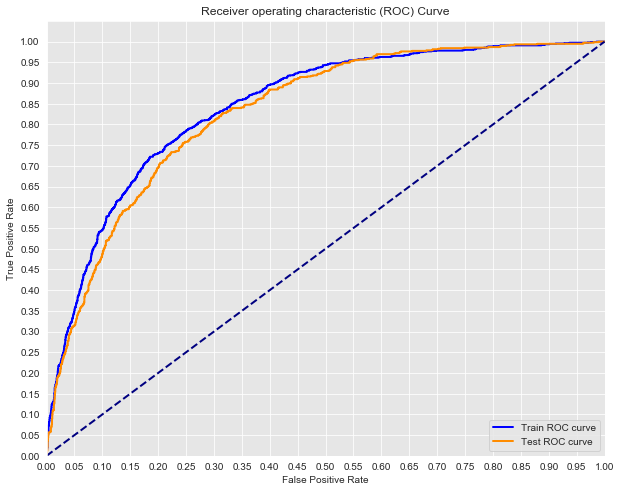

In [18]:
y_score_test = logreg_1.decision_function(X_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test)

y_score_train = logreg_1.decision_function(X_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train)

# Train AUC
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

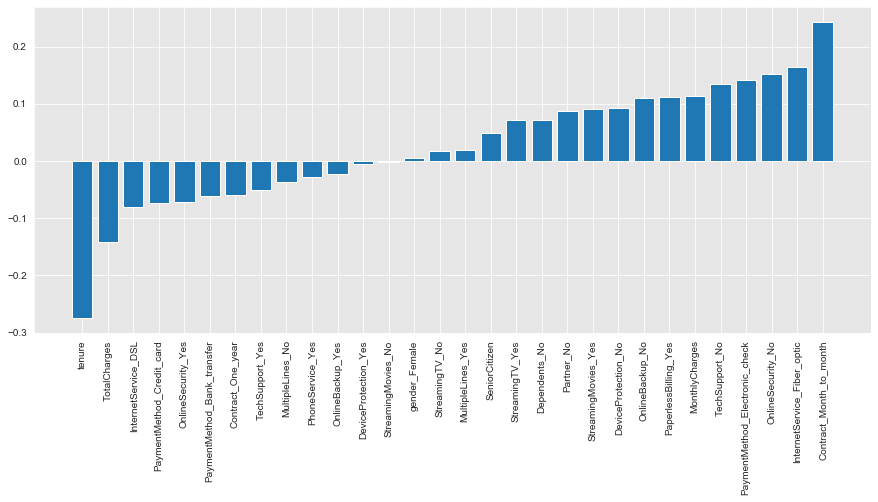

In [19]:
weights_LogReg = pd.Series(logreg_1.coef_[0], index=X.columns.values)
weights_LogReg.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(weights_LogReg.index,weights_LogReg.values)

## SVM

Following parameters maybe set and changed to get better accuracy 

* kernal: [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
* C:  [100, 10, 1, 0.1, 0.01, 0.001] => how soft is the soft margin. low C means errors matter less
* degree: [2, 3] => highest order of poly kernal. ignored for other kernals 
* 'tol': [1e-4] => stopping criterion increased a little here



In [20]:
# Grid search for support vector classifier 
clf_svm = SVC()

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [100, 10, 1, 0.1, 0.01, 0.001],
    'degree': [2, 3],
    'tol': [1e-4],
    'gamma': ['auto'],
}
grid_clf = GridSearchCV(clf_svm, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_clf.fit(X_train_smote, y_train_smote)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_smote)
val_preds = grid_clf.predict(X_test)
training_recall = recall_score(y_train_smote, training_preds)
val_recall = recall_score(y_test, val_preds)

print("")
print("Training recall: {:.4}%".format(training_recall * 100))
print("Validation recall: {:.4}%".format(val_recall * 100))

Grid Search found the following optimal parameters: 
C: 0.001
degree: 3
gamma: 'auto'
kernel: 'poly'
tol: 0.0001

Training recall: 97.46%
Validation recall: 96.45%


In [21]:
# accuracy matric of the best set of parameters  
clf_svm_1 = SVC(kernel ='poly', C=0.001, degree= 3,  tol = 0.0001, gamma = 'auto')
clf_svm_1.fit(X_train_smote, y_train_smote)

#Predict the response for test dataset
prediction_test = clf_svm_1.predict(X_test)
prediction_train = clf_svm_1.predict(X_train)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.45532116615311685
Model accuracy Score: 0.45680767863490934
------------------------------------------------------------
Confusion Matrix:
 Predicted    0     1   All
Actual                    
0          551  1501  2052
1           27   734   761
All        578  2235  2813
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.95      0.27      0.42      2052
           1       0.33      0.96      0.49       761

    accuracy                           0.46      2813
   macro avg       0.64      0.62      0.45      2813
weighted avg       0.78      0.46      0.44      2813



In [22]:
# coef_[0] is only available for linear kernals 
#weights_svm = pd.Series(clf_svm_1.coef_[0], index=X.columns.values)
#weights_svm.sort_values(inplace=True)
#plt.figure(figsize=(15, 6))
#plt.xticks(rotation=90)
#features=plt.bar(weights_svm.index,weights_svm.values)


### XGBoost

In [23]:
from sklearn.model_selection import GridSearchCV
clf_xgb = XGBClassifier()
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [3, 9, 12],
    'min_child_weight': [10, 18],
    'subsample': [0.3, 0.9],
    'n_estimators': [5, 30, 100, 250],
    'nthread' : [-1],
}
grid_clf = GridSearchCV(clf_xgb, param_grid, scoring='recall', cv=5, n_jobs=1)
grid_clf.fit(X_train_smote, y_train_smote)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_smote)
val_preds = grid_clf.predict(X_test)
training_accuracy = recall_score(y_train_smote, training_preds)
val_accuracy = recall_score(y_test, val_preds)

print("")
print("Training recall: {:.4}%".format(training_accuracy * 100))
print("Validation recall: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 3
min_child_weight: 18
n_estimators: 30
nthread: -1
subsample: 0.9

Training recall: 87.72%
Validation recall: 73.46%


## Decision Tree

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train_smote, y_train_smote)
#clf = clf.fit(X_train_resampled, y_train_resampled)


#Predict the response for test dataset
prediction_test = clf.predict(X_test)
prediction_train = clf.predict(X_train)

# model results
results(y_train, y_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.7892865607963973
Model accuracy Score: 0.7643085673658017
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0          1672  380  2052
1           283  478   761
All        1955  858  2813
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2052
           1       0.56      0.63      0.59       761

    accuracy                           0.76      2813
   macro avg       0.71      0.72      0.71      2813
weighted avg       0.77      0.76      0.77      2813



C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



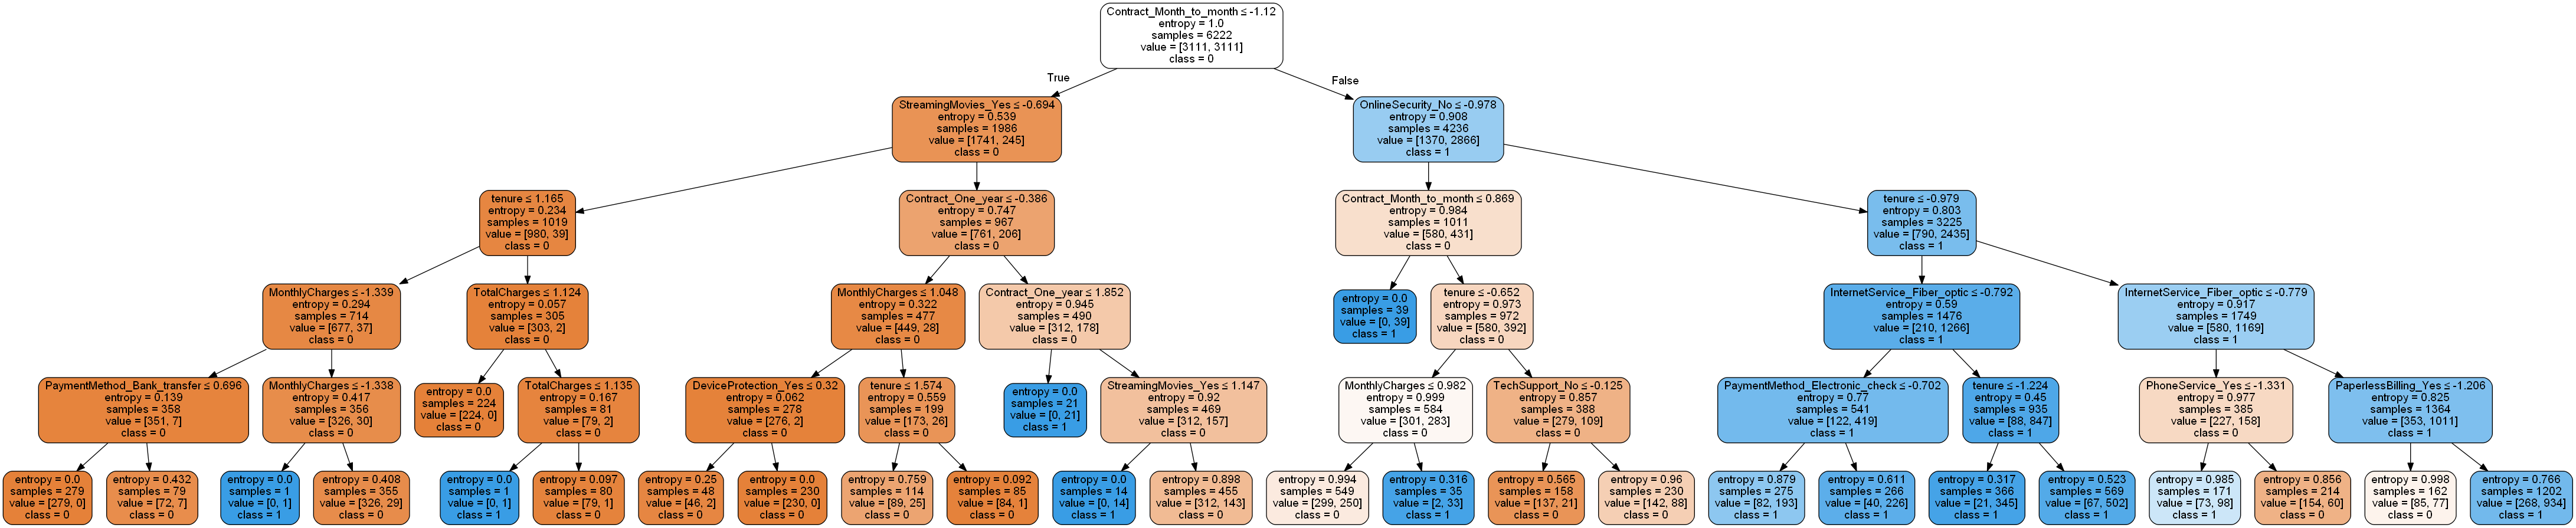

In [25]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

col_names = list(X.columns)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('img/tree1.png')
Image(graph.create_png())

## Feature engineering
Can we change or remove columns to remove colliniarity and improve accuracy 

In [26]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month_to_month',
       'Contract_One_year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank_transfer', 'PaymentMethod_Credit_card',
       'PaymentMethod_Electronic_check'],
      dtype='object')

In [27]:
X1 = df.drop(['PhoneService_Yes','InternetService_DSL', 'InternetService_Fiber_optic', 'gender_Female','Churn'], axis = 1)
y1 = df['Churn']
split_size = 0.4
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=split_size,random_state=63)
#scale features 
ss = StandardScaler()
# Scale the train and test data
X1_train = ss.fit_transform(X1_train)
X1_test = ss.transform(X1_test)

#SMOTE it
smote = SMOTE()
X1_train_smote, y1_train_smote = smote.fit_sample(X1_train, y1_train) 
print(pd.Series(y1_train_smote).value_counts())

1    3111
0    3111
dtype: int64


In [28]:
# LogisticRegression
name = "Logistic Regression"
logit = LogisticRegression()
model1 = model_report(logit,X1_train_smote,X1_test,y1_train_smote,y1_test,name)

# DecisionTree Classifier
name = "Decision Tree"
decision_tree = DecisionTreeClassifier(random_state = 0)
# X_train_resampled,X_test,y_train_resampled,y_test,name
model2 = model_report(decision_tree,X1_train_smote,X1_test,y1_train_smote,y1_test,name)

# KNeighborsClassifier
name = "KNN Classifier"
knn = KNeighborsClassifier(n_neighbors=3)
model3 = model_report(knn,X1_train_smote,X1_test,y1_train_smote,y1_test,name)

name = "Naive Bayes"
gnb = GaussianNB(priors=None)
model4 = model_report(gnb,X1_train_smote,X1_test,y1_train_smote,y1_test,name)

name = "Random Forest Classifier"
rfc = RandomForestClassifier(random_state=0)
model5 = model_report(rfc,X1_train_smote,X1_test,y1_train_smote,y1_test,name)

name = "SVM Classifier Linear"
svc  = SVC(gamma='auto', kernel='linear')
model6 = model_report(svc,X1_train_smote,X1_test,y1_train_smote,y1_test,name)

name = "XGBoost Classifier"
xgc = XGBClassifier()
model7 = model_report(xgc,X1_train_smote,X1_test,y1_train_smote,y1_test,name)

#concat all models
model_performances = pd.concat([model1,model2,model3,model4,
                                model5,model6,model7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
display(model_performances)

model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")

data = [trace1,trace2,trace3,trace4]
go.Figure(data=data,layout=layout)


C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve
0,Logistic Regression,0.752222,0.760841,0.529250,0.624259,0.754933
1,Decision Tree,0.713118,0.544021,0.473684,0.506422,0.659925
2,KNN Classifier,0.696054,0.625493,0.455067,0.526840,0.673857
3,Naive Bayes,0.746889,0.731932,0.523005,0.610077,0.742184
4,Random Forest Classifier,0.765375,0.500657,0.576399,0.535865,0.682102
5,SVM Classifier Linear,0.742268,0.768725,0.515873,0.617414,0.750591
6,XGBoost Classifier,0.774618,0.659658,0.572406,0.612943,0.738455


In [29]:
# after Gridsearch
logreg_new = LogisticRegression(C=0.001, fit_intercept= True, max_iter= 200, penalty= 'l2', 
                              random_state= 11, solver= 'liblinear')
logreg_new.fit(X1_train_smote, y1_train_smote)

#predictions
prediction_train = logreg_new.predict(X1_train)
prediction_test = logreg_new.predict(X1_test)

# model results
results(y1_train, y1_test, prediction_train, prediction_test)

------------------------------------------------------------
Training accuracy Score: 0.7260014221379474
Model accuracy Score: 0.7330252399573409
------------------------------------------------------------
Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1460   592  2052
1           159   602   761
All        1619  1194  2813
------------------------------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      2052
           1       0.50      0.79      0.62       761

    accuracy                           0.73      2813
   macro avg       0.70      0.75      0.71      2813
weighted avg       0.79      0.73      0.75      2813



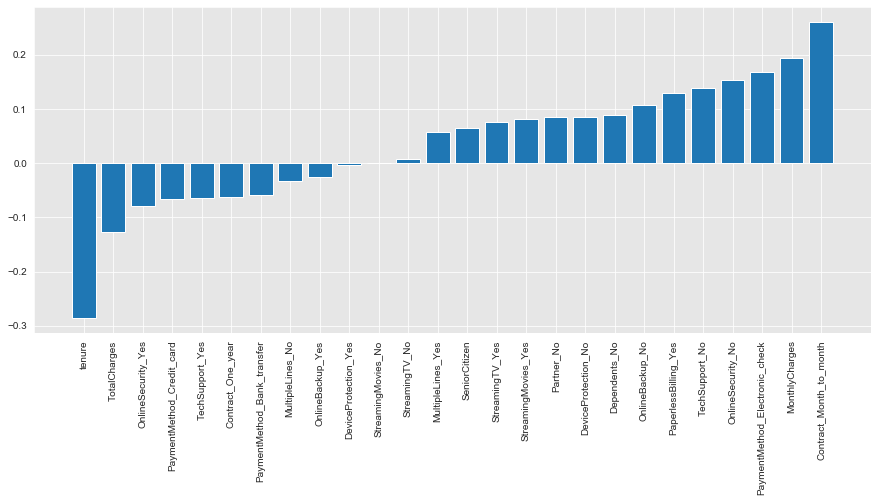

In [30]:
weights_LogReg = pd.Series(logreg_new.coef_[0], index=X1.columns.values)
weights_LogReg.sort_values(inplace=True)
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
features=plt.bar(weights_LogReg.index,weights_LogReg.values)